In [1]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
customers_df = pd.read_csv(r'C:\Users\nguye\Desktop\Data analysis\2. Underwear Data with 11 Tables & up to 100K+ rows\customers.csv', encoding = ' UTF-16')
employees_df = pd.read_csv(r'C:\Users\nguye\Desktop\Data analysis\2. Underwear Data with 11 Tables & up to 100K+ rows\employees.csv', encoding = 'UTF-16')
inventory_trans_df = pd.read_csv(r'C:\Users\nguye\Desktop\Data analysis\2. Underwear Data with 11 Tables & up to 100K+ rows\inventory_transactions.csv', encoding = 'Latin-1')
order_details_df = pd.read_csv(r'C:\Users\nguye\Desktop\Data analysis\2. Underwear Data with 11 Tables & up to 100K+ rows\order_details.csv', encoding = 'Latin-1')
orders_df = pd.read_csv(r'C:\Users\nguye\Desktop\Data analysis\2. Underwear Data with 11 Tables & up to 100K+ rows\orders.csv', encoding = 'Latin-1')
payment_methods_df = pd.read_csv(r'C:\Users\nguye\Desktop\Data analysis\2. Underwear Data with 11 Tables & up to 100K+ rows\payment_methods.csv', encoding = 'Latin-1')
payments_df = pd.read_csv(r'C:\Users\nguye\Desktop\Data analysis\2. Underwear Data with 11 Tables & up to 100K+ rows\payments.csv', encoding = 'Latin-1')
products_df = pd.read_csv(r'C:\Users\nguye\Desktop\Data analysis\2. Underwear Data with 11 Tables & up to 100K+ rows\products.csv', encoding = 'Latin-1')
purchase_orders_df = pd.read_csv(r'C:\Users\nguye\Desktop\Data analysis\2. Underwear Data with 11 Tables & up to 100K+ rows\purchase_orders.csv', encoding = 'Latin-1')
shipping_methods_df = pd.read_csv(r'C:\Users\nguye\Desktop\Data analysis\2. Underwear Data with 11 Tables & up to 100K+ rows\shipping_methods.csv', encoding = 'Latin-1')
suppliers_df = pd.read_csv(r'C:\Users\nguye\Desktop\Data analysis\2. Underwear Data with 11 Tables & up to 100K+ rows\suppliers.csv', encoding = 'Latin-1')

In [3]:
#storing temp database in os memory
conn = sqlite3.connect(':memory:')

In [4]:
customers_df.to_sql('customers',conn,index = False)
employees_df.to_sql('employees',conn,index = False)
inventory_trans_df.to_sql('inventory_trans',conn,index = False)
order_details_df.to_sql('order_details',conn,index = False)
orders_df.to_sql('orders',conn,index = False)
payment_methods_df.to_sql('payment_methods',conn,index = False)
payments_df.to_sql('payments',conn,index = False)
products_df.to_sql('products',conn,index = False)
purchase_orders_df.to_sql('purchase_orders',conn,index = False)
shipping_methods_df.to_sql('shipping_methods',conn,index = False)
suppliers_df.to_sql('suppliers_df',conn,index = False)

2

#### Dataframes explaination  
 **Customers** : Details on the Company's customers.  
 **Employees** : Information about the Company's employees.  
 **Products**: Inventory of products sold by the Company.   
 **Suppliers**: Information on the Company's suppliers.   
 **Purchase Orders**: Records of orders placed by the Company to acquire products from suppliers.    
 **Inventory Transactions**: Inventory records, including purchase orders, receipts, and missing items.   
 **Orders**: Customer orders for the Company's goods.   
 **Order Details**: Data on quantities sold and sale prices of products, linked to customer orders.    
 **Shipping Methods**: Descriptions of the shipping methods used for purchasing or selling products.    
 **Payment Methods**: Overview of payment methods available to customers.    
 **Payments**: Records of payments made by customers to the Company.


# Exploratory data analysis


## Revenue/Profit and Orders growth

In [5]:
order_details_df.head()

,OrderDetailID,OrderID,ProductID,QuantitySold,UnitSalesPrice
0,2,2,955,5,7.5
1,3,2,958,5,8.5
2,5,2,959,5,8.5
3,6,4,72,50,3.0
4,7,4,9,50,3.2


In [6]:
orders_df.head()

,OrderID,CustomerID,EmployeeID,ShippingMethodID,OrderDate,ShipDate,FreightCharge
0,2,1,1,1.0,7/10/2003,7/10/2003,0.0
1,4,2,2,1.0,7/11/2003,7/11/2003,0.0
2,5,2,1,1.0,7/15/2003,7/15/2003,0.0
3,6,3,1,1.0,7/14/2003,7/14/2003,0.0
4,7,4,1,1.0,7/14/2003,7/15/2003,0.0


In [7]:
#No missing data
order_details_df.isna().sum()

OrderDetailID     0
OrderID           0
ProductID         0
QuantitySold      0
UnitSalesPrice    0
dtype: int64

In [8]:
#No important missing data
orders_df.isna().sum()

OrderID             0
CustomerID          0
EmployeeID          0
ShippingMethodID    8
OrderDate           0
ShipDate            0
FreightCharge       0
dtype: int64

### Profit per Item

In [9]:
#Finding average purchase price of an item
product_purchase_price =inventory_trans_df.groupby('ProductID')['UnitPurchasePrice'].mean().reset_index()
product_purchase_price.to_sql('product_purchase_price',conn,index = False)
#Average sale price of an item
product_sell_price = order_details_df.groupby('ProductID')['UnitSalesPrice'].mean().reset_index()
product_sell_price.to_sql('product_sell_price',conn,index = False)
#query join purchase and sale dataframe
query= ''' 
SELECT ppp.*,psp.UnitSalesPrice
FROM product_purchase_price AS ppp
LEFT JOIN product_sell_price AS psp ON ppp.ProductID = psp.ProductID
'''
product_profit_df = pd.read_sql_query(query,conn)
#drop NaN
product_profit_df.dropna(inplace=True)
#Profit per unit
product_profit_df['ProfitPerUnit'] = product_profit_df['UnitSalesPrice']-product_profit_df['UnitPurchasePrice']
product_profit_df.to_sql('product_profit_price',conn,index = False)

3974

In [10]:
product_profit_df.head()

,ProductID,UnitPurchasePrice,UnitSalesPrice,ProfitPerUnit
0,1,6.600000,10.185246,3.585246
1,2,5.555556,8.459375,2.903819
2,3,6.040909,9.403947,3.363038
3,4,5.331250,8.661654,3.330404
4,5,3.223333,4.638462,1.415128


In [11]:
#since there are quite a few dataframes, I have decided to put important data in one dataframe for ease of use
query = '''
SELECT  
c.CustomerID, c.CustomerClass, c.Region, p.ProductName, p.ProductLine,
p.Category, p.Gender, p.Status, o.OrderDate,
o.ShipDate, p.InventoryDate, od.QuantitySold, 
od.UnitSalesPrice,ppp.ProfitPerUnit,sp.ShippingMethod, o.FreightCharge
FROM order_details AS od
LEFT JOIN orders AS o ON od.OrderID = o.OrderID
LEFT JOIN customers AS c ON o.CustomerID = c.CustomerID
LEFT JOIN products AS p ON od.ProductID = p.ProductID
LEFT JOIN shipping_methods AS sp ON o.ShippingMethodID = sp.ShippingMethodID
LEFT JOIN product_profit_price AS ppp  ON od.ProductID = ppp.ProductID
'''
df = pd.read_sql_query(query,conn)
df.head()

,CustomerID,CustomerClass,Region,ProductName,ProductLine,Category,Gender,Status,OrderDate,ShipDate,InventoryDate,QuantitySold,UnitSalesPrice,ProfitPerUnit,ShippingMethod,FreightCharge
0,1,Large-Scale Wholesaler-1,Moscow,XXL-PCL29,Underwear,Drawers,Women's Panties,In Production,7/10/2003,7/10/2003,7/10/2003,5,7.5,2.958956,Ex Works,0.0
1,1,Large-Scale Wholesaler-1,Moscow,XXL-PCL31S,Underwear,Drawers,Women's Panties,In Production,7/10/2003,7/10/2003,7/10/2003,5,8.5,3.040725,Ex Works,0.0
2,1,Large-Scale Wholesaler-1,Moscow,XXL-PCL31T,Underwear,Drawers,Women's Panties,In Production,7/10/2003,7/10/2003,7/10/2003,5,8.5,3.064058,Ex Works,0.0
3,2,Large-Scale Wholesaler-1,Moscow,2-ERK61,Underwear,Briefs,Boys' Briefs,In Production,7/11/2003,7/11/2003,7/10/2003,50,3.0,1.104112,Ex Works,0.0
4,2,Large-Scale Wholesaler-1,Moscow,3-ERK61,Underwear,Briefs,Boys' Briefs,In Production,7/11/2003,7/11/2003,7/10/2003,50,3.2,1.193187,Ex Works,0.0


In [12]:
df.isna().sum()

CustomerID          0
CustomerClass       0
Region              0
ProductName         0
ProductLine         0
Category            0
Gender              0
Status              0
OrderDate           0
ShipDate            0
InventoryDate       0
QuantitySold        0
UnitSalesPrice      0
ProfitPerUnit     524
ShippingMethod    487
FreightCharge       0
dtype: int64

In [13]:
len(df)

105757

In [14]:
#524 ProfitPerUnit data is missing. Since it is only 0.5% data, we can replace it with the average price per unit
def missingvalue(row):
    if pd.isna(row):
        return df['ProfitPerUnit'].mean()
    else:
        return row
df['ProfitPerUnit'] = df['ProfitPerUnit'].apply(missingvalue)

In [15]:
df.isna().sum()

CustomerID          0
CustomerClass       0
Region              0
ProductName         0
ProductLine         0
Category            0
Gender              0
Status              0
OrderDate           0
ShipDate            0
InventoryDate       0
QuantitySold        0
UnitSalesPrice      0
ProfitPerUnit       0
ShippingMethod    487
FreightCharge       0
dtype: int64

In [16]:
#converting to datetime
df['OrderDate'] = pd.to_datetime(df["OrderDate"])
df['ShipDate'] = pd.to_datetime(df["ShipDate"])
df['InventoryDate'] = pd.to_datetime(df['InventoryDate'])

In [17]:
#Cutting off incomplete months
df = df[(df['OrderDate'] > '2003-07-31')&(df['OrderDate'] < '2006-04-01')]

In [18]:
#extraction of day,month,year
df['day'] = df['OrderDate'].dt.day
df['month'] = df['OrderDate'].dt.month
df['year'] = df['OrderDate'].dt.year
#total price per order
df['total price'] = df['QuantitySold']*df['UnitSalesPrice']
df['profit'] = df['ProfitPerUnit']*df['QuantitySold']
df.head()

,CustomerID,CustomerClass,Region,ProductName,ProductLine,Category,Gender,Status,OrderDate,ShipDate,...,QuantitySold,UnitSalesPrice,ProfitPerUnit,ShippingMethod,FreightCharge,day,month,year,total price,profit
674,2,Large-Scale Wholesaler-1,Moscow,XL-BX172,Underwear,Boxers,Men's Briefs,Out of Production,2003-08-01,2003-08-01,...,20,2.1,0.831921,Ex Works,0.0,1,8,2003,42.0,16.638418
675,2,Large-Scale Wholesaler-1,Moscow,XL-BX171,Underwear,Boxers,Men's Briefs,Out of Production,2003-08-01,2003-08-01,...,20,2.1,0.750000,Ex Works,0.0,1,8,2003,42.0,15.000000
676,2,Large-Scale Wholesaler-1,Moscow,M-BX172,Underwear,Boxers,Men's Briefs,Out of Production,2003-08-01,2003-08-01,...,35,1.8,0.791667,Ex Works,0.0,1,8,2003,63.0,27.708333
677,2,Large-Scale Wholesaler-1,Moscow,L-BX172,Underwear,Boxers,Men's Briefs,Out of Production,2003-08-01,2003-08-01,...,30,2.0,0.826344,Ex Works,0.0,1,8,2003,60.0,24.790323
678,2,Large-Scale Wholesaler-1,Moscow,L-191,Underwear,Undershirts,Men's Undershirts,In Production,2003-08-01,2003-08-01,...,8,8.7,3.699305,Ex Works,0.0,1,8,2003,69.6,29.594439


In [19]:
#grouping total prices of each month from August 2003 to March of 2006
df2 = df.groupby(['year','month'])['total price'].agg(['sum','count']).reset_index()

In [20]:
#creating x axis for ploting
df2['date'] = df2['year'].astype('string')+'-'+df2['month'].astype('string')

In [21]:
df3 = df.groupby(['year','month'])['CustomerClass'].value_counts().reset_index()
df3['date'] = df3['year'].astype('string')+'-'+df3['month'].astype('string')

In [22]:
df4 = df.groupby(['year','month'])['profit'].agg(['sum']).reset_index()
df4['date'] = df4['year'].astype('string')+'-'+df4['month'].astype('string')

Text(0, 0.5, 'USD')

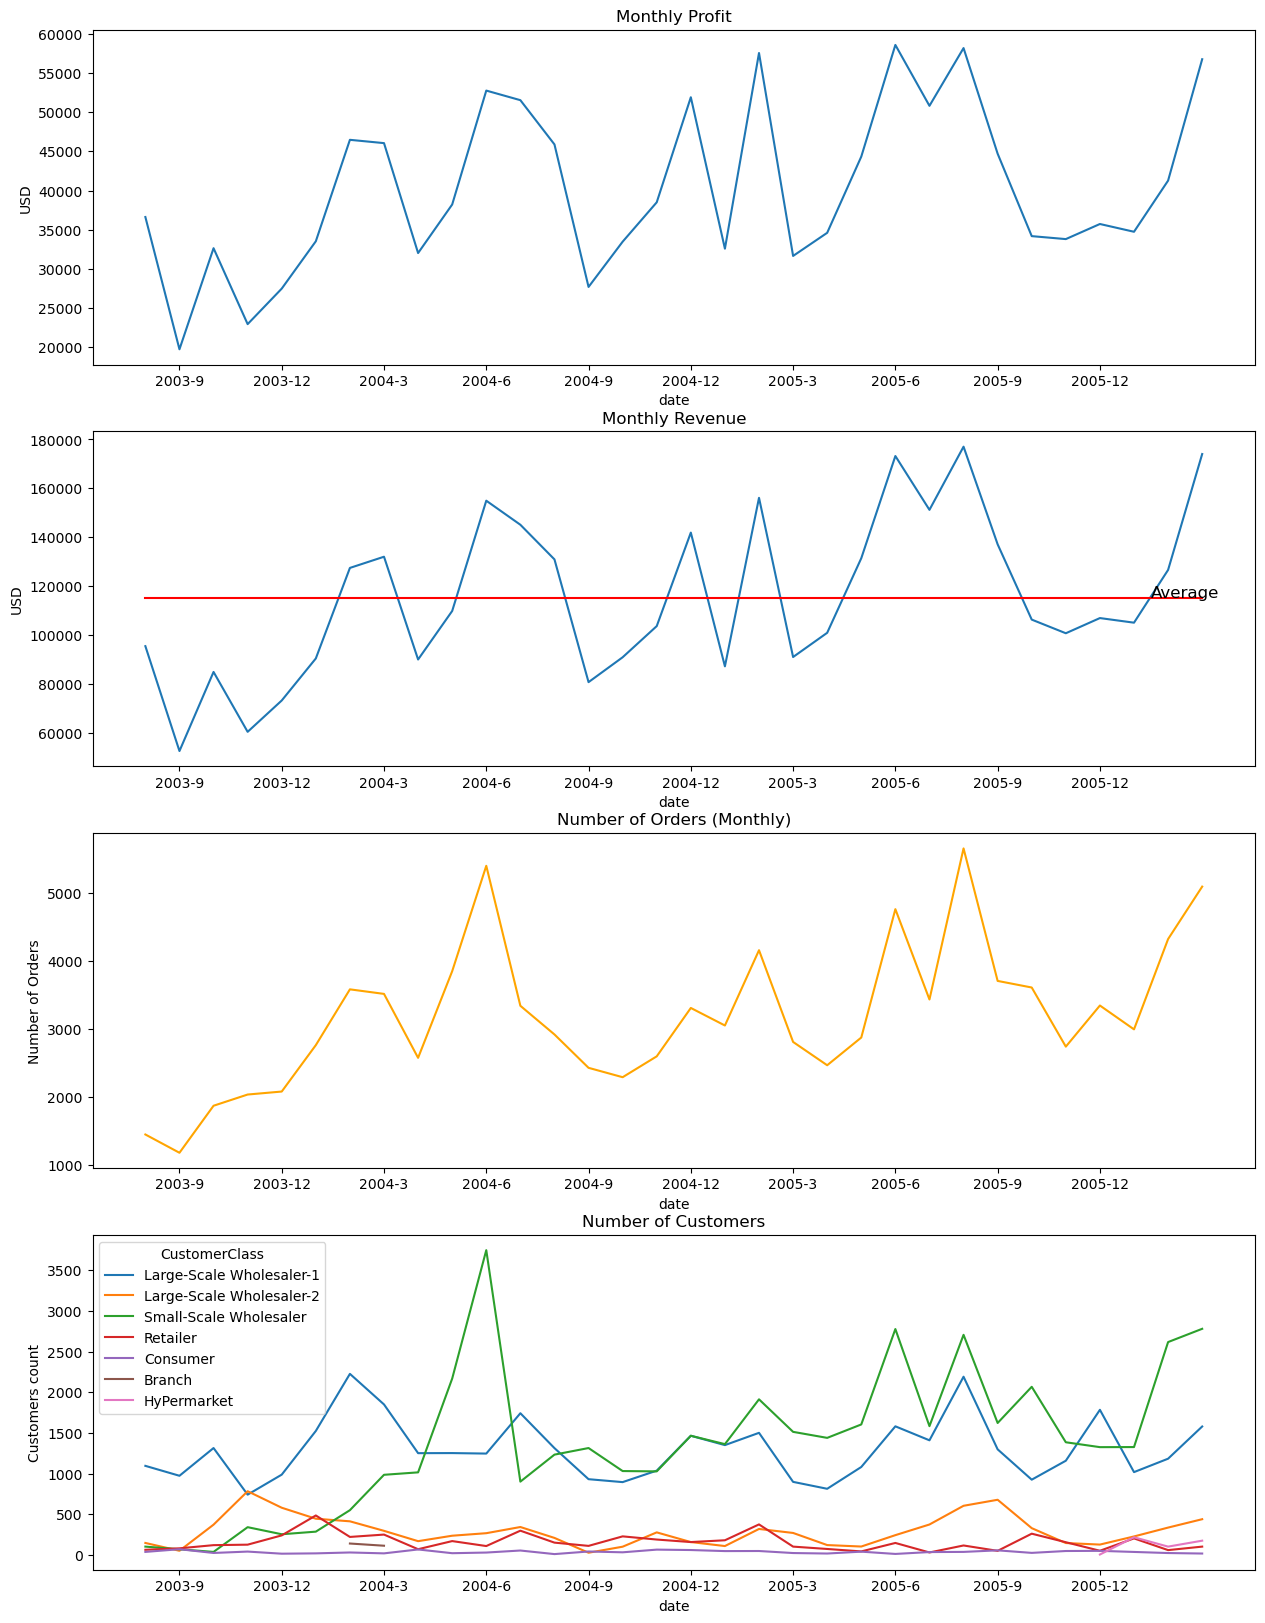

In [23]:
plt.figure(figsize = (15,20))
plt.subplot(412)
plt.title('Monthly Revenue')
sns.lineplot(df2, x='date', y = 'sum')
plt.ylabel('USD')
plt.twinx
sns.lineplot(data=df2, x="date", y=df2['sum'].mean(), color="red")
plt.text(x=29.5, y=df2['sum'].mean(), s="Average", size = 'large')
plt.xticks(ticks=list(range(1, 31, 3)))
plt.subplot(413)
plt.title('Number of Orders (Monthly)')
sns.lineplot(df2, x='date', y = 'count', color = 'orange')
plt.ylabel('Number of Orders')
plt.xticks(ticks=list(range(1, 31, 3)))
plt.subplot(414)
plt.title('Number of Customers') 
plt.xticks(ticks=list(range(1,31,3)))
sns.lineplot(df3, x = 'date', y = 'count',hue='CustomerClass')
plt.ylabel('Customers count')
plt.subplot(411)
plt.title('Monthly Profit')
sns.lineplot(df4, x='date', y = 'sum')
plt.xticks(ticks=list(range(1, 31, 3)))
plt.ylabel('USD')

In [24]:
df2['revenue rate'] = df2['sum'].pct_change()
df2['order rate'] = df2['count'].pct_change()
df4['profit rate'] = df4['sum'].pct_change()
print('Average order rate growth over 31 months',df2['order rate'].mean())
print('Average revenue rate growth over 31 months',df2['revenue rate'].mean())
print('Average profit rate growth over 31 months',df4['profit rate'].mean())

Average order rate growth over 31 months 0.08336969928506606
Average revenue rate growth over 31 months 0.06608848503362875
Average profit rate growth over 31 months 0.06133050037821795


### Takeaway
#### Profit/Revenue and Orders
This company is growing rapidly, with average monthly order rate of 8.3% and a 6.6% of revenue growth.
While profit rate is the lowest of them all, at 6.1%, it is still a very strong number.
Over the course of 31 months, the company has managed to almost double its revenue and profit and triple the order rate.
Although there is a volatile fluctuation, it can be explained with seasonal buying behaviours in clothing industry where the usual peak would be in the beginning of summer and chrismass season.
#### Customers
In terms of customers gain, it is mostly contributed by Small-Scale Wholesaler. Starting from almost 0 customers in august 2003 and ended with a whopping 3000 customers. Although it should be noted that every customer category has ended with higher number than starting. 

## Products and Inventory

In [25]:
#datacleaning
products_df.drop(columns = ['Color','ModelDescription','FabricDescription'], inplace = True)

In [26]:
#cleaning data. splitting size from product name
products_df['ProductName'] = products_df['ProductName'].astype('string')
def split_hyphen(row):
    return row.split('-')[-1]
products_df['ProductName'] = products_df['ProductName'].apply(split_hyphen)
df['ProductName'] = df['ProductName'].apply(split_hyphen)

In [27]:
print('Total number of products:',products_df['ProductName'].count())
print('Number of type products:',products_df['ProductName'].nunique())
print('Each product has about',products_df.groupby('ProductName')['Size'].count().mean(),"sizes")

Total number of products: 4183
Number of type products: 1357
Each product has about 3.0722181282240237 sizes


<Axes: title={'center': 'Monthly Categories Revenue'}, xlabel='date', ylabel='Revenue'>

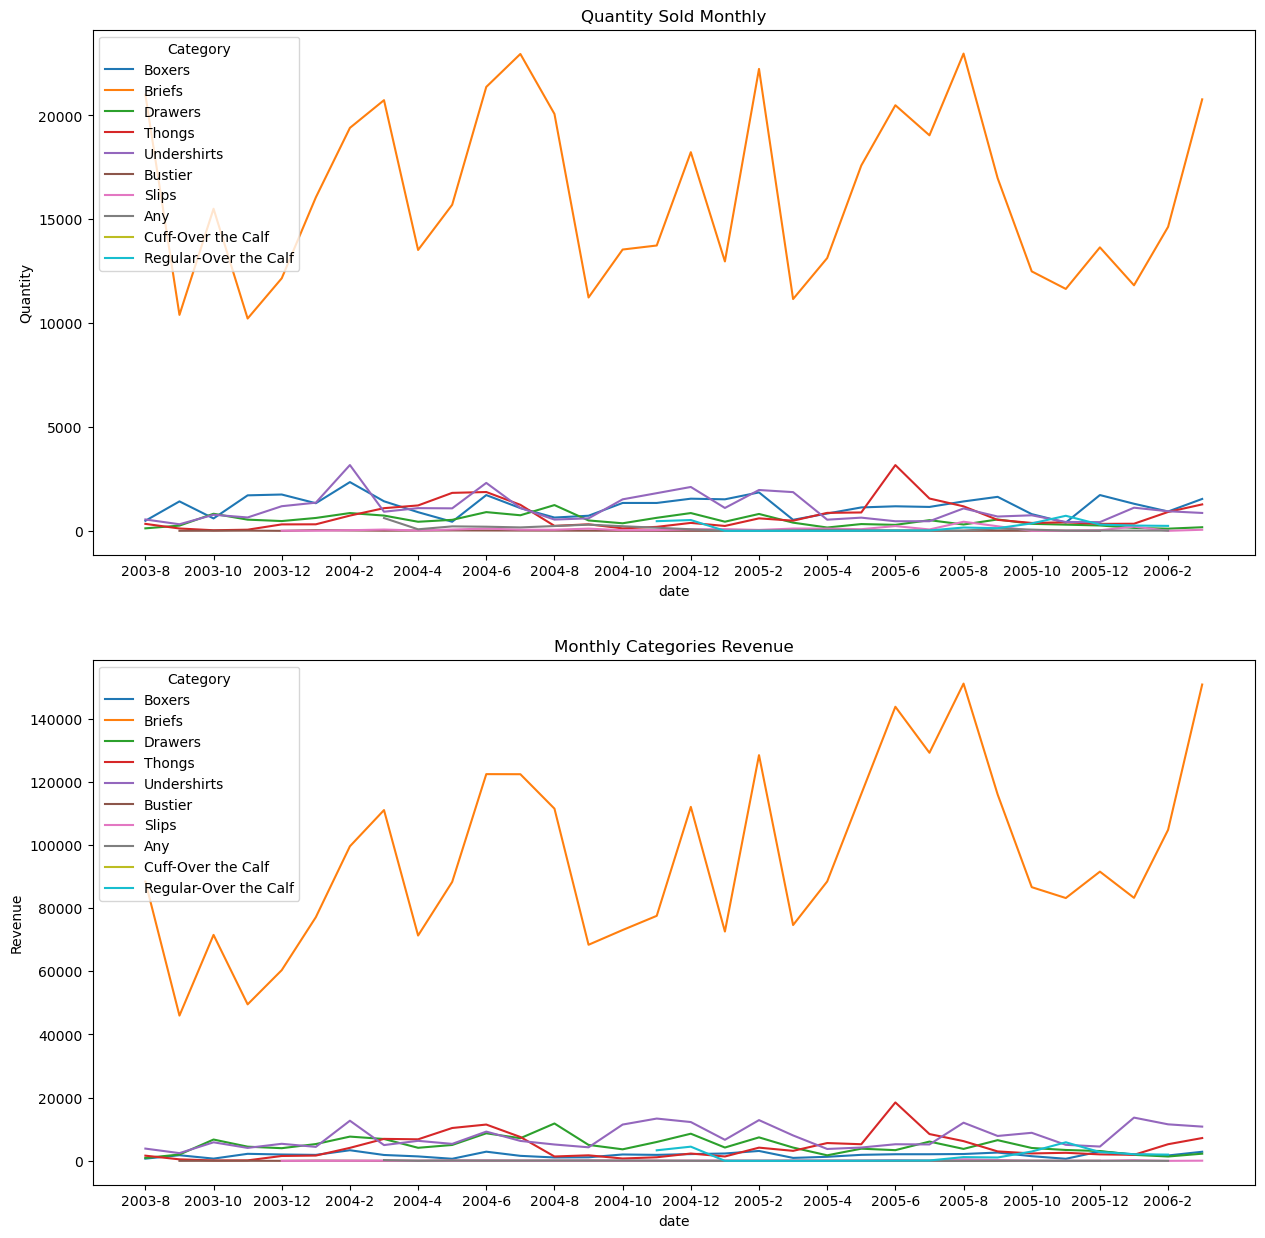

In [28]:
#Visualization
quantity_df = df.groupby(['year','month','Category'])[['QuantitySold','total price']].sum().reset_index()
quantity_df['date'] = quantity_df['year'].astype('string')+'-'+quantity_df['month'].astype('string')
plt.figure(figsize = (15,15))
plt.subplot(211)
plt.title('Quantity Sold Monthly')
plt.ylabel('Quantity')
sns.lineplot(quantity_df, x = 'date' , y = 'QuantitySold',hue = 'Category')
plt.xticks(ticks=list(range(0,31,2)))
plt.subplot(212)
plt.title('Monthly Categories Revenue')
plt.xticks(ticks=list(range(0,31,2)))
plt.ylabel('Revenue')
sns.lineplot(quantity_df, x = 'date' , y = 'total price',hue = 'Category')

In [29]:
#datacleaning. 
gender_df= df.groupby(['Gender','Category'])['total price'].agg(['sum']).reset_index()
gender_df['Gender']=gender_df['Gender'].astype('string')
#since the dataframe does not contain Sex (male or female) we need to create it
def splitsex(row):
    return row.split("'")[0]
gender_df['Sex'] = gender_df['Gender'].apply(splitsex)
def sex(row):
    if row in ['Boys','Men']:
        return "Male"
    elif row in ['Girls','Women']:
        return "Female"
    else:
        return "Unknown"
gender_df['Sex2']=gender_df['Sex'].apply(sex)
gender_df.drop(columns = ["Gender","Sex"],inplace=True)

In [30]:
gender_df

,Category,sum,Sex2
0,Any,767.80,Unknown
1,Boxers,4838.30,Male
2,Briefs,65944.20,Male
3,Undershirts,11395.50,Male
4,Regular-Over the Calf,14087.20,Unknown
5,Briefs,208587.30,Female
6,Undershirts,40706.90,Female
7,Boxers,54538.00,Male
8,Briefs,190550.82,Male
9,Slips,2051.90,Male


In [31]:
a = gender_df.groupby(['Category','Sex2'])['sum'].sum().reset_index().sort_values(by="sum",ascending=False)
a.head()

,Category,Sex2,sum
3,Briefs,Female,2814210.85
4,Briefs,Male,256495.02
7,Drawers,Female,155709.60
15,Undershirts,Male,147370.80
12,Thongs,Female,137244.30


Text(0.5, 1.0, 'Product Category Revenue by Gender')

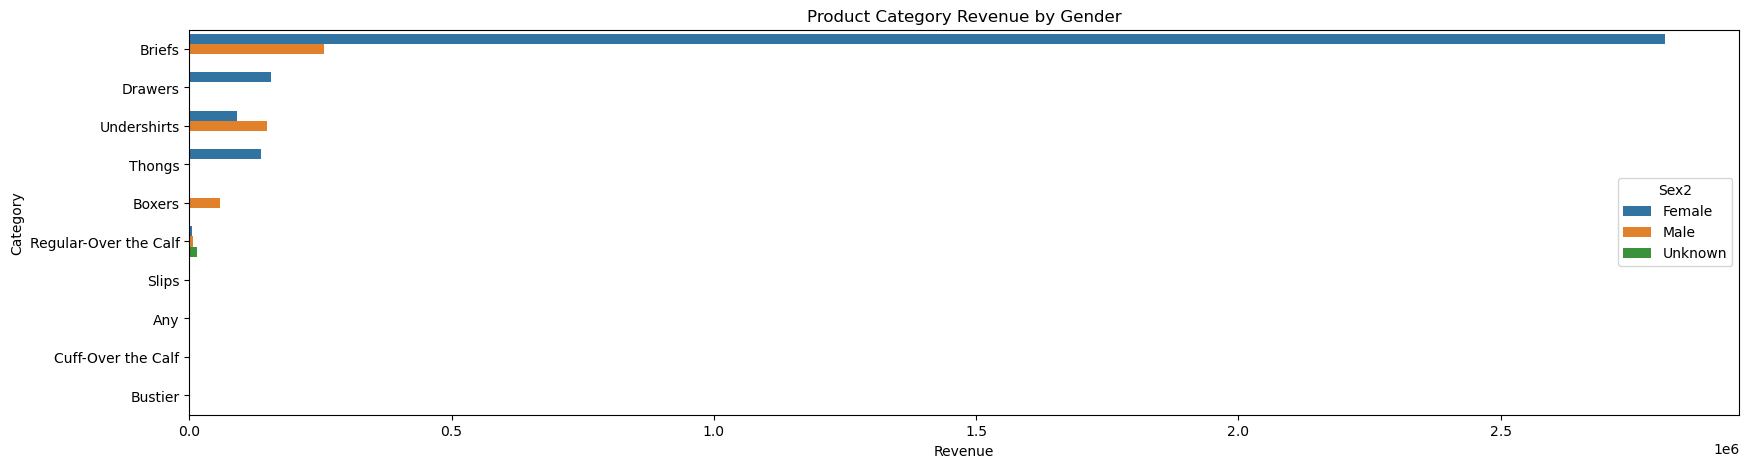

In [32]:
plt.figure(figsize=(20,5))
sns.barplot(a, y = "Category",x="sum",hue="Sex2")
plt.xlabel("Revenue")
plt.title("Product Category Revenue by Gender")

In [33]:
#Days from when item apeared in Inventory - Days item was sold = Days in Inventory
df['Days in Inventory'] = df['OrderDate'] - df['InventoryDate']
#Some data are corrupted, where "Days in Inventory" is negative. Filter days is not negative. 
days_inventory = df[df['Days in Inventory']>='0 days'].groupby(['Category'])['Days in Inventory'].mean().reset_index()
days_inventory['days'] = days_inventory['Days in Inventory'].dt.days
days_inventory.sort_values(by='days',ascending=False,inplace=True)
days_inventory

,Category,Days in Inventory,days
5,Drawers,404 days 23:27:35.552265324,404
2,Briefs,358 days 02:40:26.530280488,358
9,Undershirts,357 days 15:59:53.259215916,357
3,Bustier,328 days 03:33:20,328
1,Boxers,309 days 01:19:08.787584868,309
0,Any,275 days 04:48:00,275
7,Slips,249 days 02:26:26.440677968,249
8,Thongs,245 days 14:19:09.201943096,245
6,Regular-Over the Calf,195 days 10:23:28.936825886,195
4,Cuff-Over the Calf,4 days 04:00:00,4


Text(0.5, 1.0, 'Average Time Products Spend in Inventory by Category')

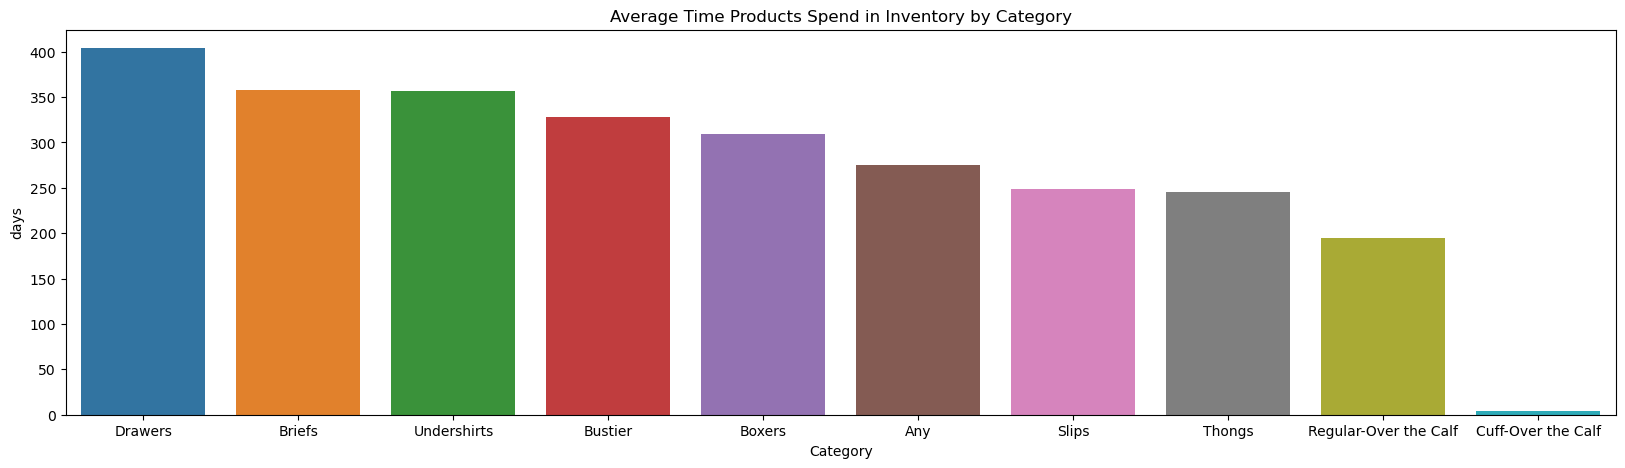

In [34]:
#Visualization
plt.figure(figsize=(20,5))
sns.barplot(days_inventory,x='Category',y='days')
plt.title('Average Time Products Spend in Inventory by Category')

In [35]:
print('average time products spend in inventory:',df['Days in Inventory'].mean())

average time products spend in inventory: 349 days 02:35:32.056291684


In [36]:
#Shipment time = Ship Date - Order Date
df['Shipment day(s)'] = df['ShipDate'] - df['OrderDate']
#Some data are corrupted, where "Shipment day(s)" is negative. Filter days is not negative. 
df[df['Shipment day(s)'] >= '0 days'].groupby('Category')['Shipment day(s)'].mean()

Category
Any                               0 days 00:00:00
Boxers                            0 days 00:00:00
Briefs                  0 days 00:00:16.216824955
Bustier                           0 days 00:00:00
Cuff-Over the Calf                0 days 00:00:00
Drawers                           0 days 00:00:00
Regular-Over the Calf             0 days 00:00:00
Slips                             0 days 00:00:00
Thongs                            0 days 00:00:00
Undershirts             0 days 00:02:52.051071805
Name: Shipment day(s), dtype: timedelta64[ns]

### Takeaway
#### Products
The Company has 1357 products, not taking into account sizes. On average one piece of clothing has about 3 sizes. These products divide into 10 categories:
1. Drawers
2. Briefs
3. Undershirts
4. Bustier
5. Boxers
6. Slips
7. Thongs
8. Regular-Over the Calf
9. Cull-Over the Calf
10. Any

Briefs out performs the other categories by miles. Every Category follows the same Market Trend. Understandable since the Company only sells underwear. Sorting by the Gender, the majority of the end audiences are women, contributing over 70% of the Revenue in the timespan. One or all of the assumptions bellow might be the cause of this phenomenon

1. Women takes much more care of what they wear.
2. Life time of Womens' products are a lot shorter.
3. Since our Revenue directly comes from B2B operations. It means that most of the direct customers' target audiences are women.

#### Inventory
The average time the products are stored in inventory is almost 1 year (349 days). Based on this number alone we can assume that the inventory flow of the Company is abysmal. With this high storage days, the company is losing a few bucks and revenue opportunities. Lowering this time by not buying items earlier than the demand, the Company can freeup its extra storage for renting space, meaning extra source of income. By better managing its inventory (stop over supplying) also means increase of on-hand cash availability which opens up new investment opportunities. Since we do not have data on storage cost or related, we can only to calculate the opportunity cost based on third-party data which might not be accurate. 

## Suplliers

In [37]:
suppliers_df

,SupplierID,SupplierName
0,1,S1
1,2,S2


In [38]:
purchase_orders_df.head()

,PurchaseOrderID,SupplierID,EmployeeID,ShippingMethodID,OrderDate
0,25,1,1,3.0,10/15/2003
1,27,1,1,3.0,9/16/2003
2,28,1,1,3.0,9/17/2003
3,29,1,1,3.0,9/17/2003
4,30,1,1,3.0,9/17/2003


In [39]:
purchase_orders_df['SupplierID'].value_counts()

SupplierID
1    225
2      7
Name: count, dtype: int64

### Takeaway
#### Supplier(s)
Surprisingly with monthly average of 120.000 USD in Revenue, the Company has only 2 suppliers and over 97% of its purchase orders goes to the first supplier (S1). With dataset only spanning 31 months it is not enough to see the problems with such a small number of suppliers. With limited sources of goods, the Company puts itself in an unsustainable situation. 

***Never put all eggs in one basket***


It is crucial to minimize the risks especially when doing business on such a big scale. The Company can be classified as a big distributor of underwear,
Assumming that The Company is not under any legal obligations of the supliers (exclusivity) nor it is a veritically integrated company (S1 is not a daughter nor a mother company), it is dire for them to sustain the sources of goods by diversifying suppliers. If there were some troubles with its partner (s1) (disagreement with supplier, force majeur, unsustainable prices, supplier going under etc.) it WILL disrupt the whole chain of supply, causing the Company not meeting market demands. 

# Machine Learning

## Demand Prediction 
#### With Machine Learning we can estimate the incoming Demand. Based on this data The Company can determine at what quantity and time to order from the suppliers. Which, based on analysis above, frees up cash-on hand availability that in turn creates new investment opportunities.